In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
for column in train_data.columns:
  if train_data[column].dtype == 'object':
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    if column in test_data.columns:
       test_data[column].fillna(test_data[column].mode()[0], inplace=True)
  else:
     train_data[column].fillna(train_data[column].mean(), inplace=True)
     if column in test_data.columns:
      test_data[column].fillna(test_data[column].mean(), inplace=True)

features =['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X=train_data[features]
y=train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

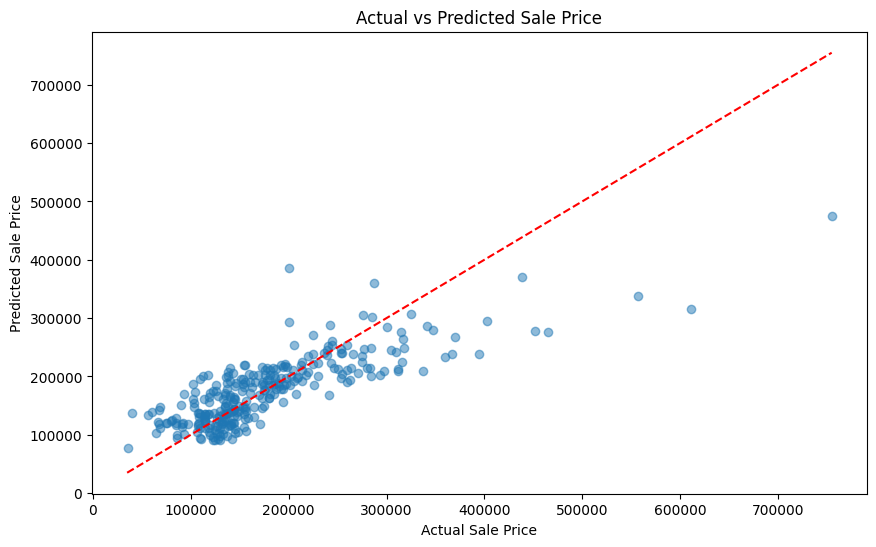

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

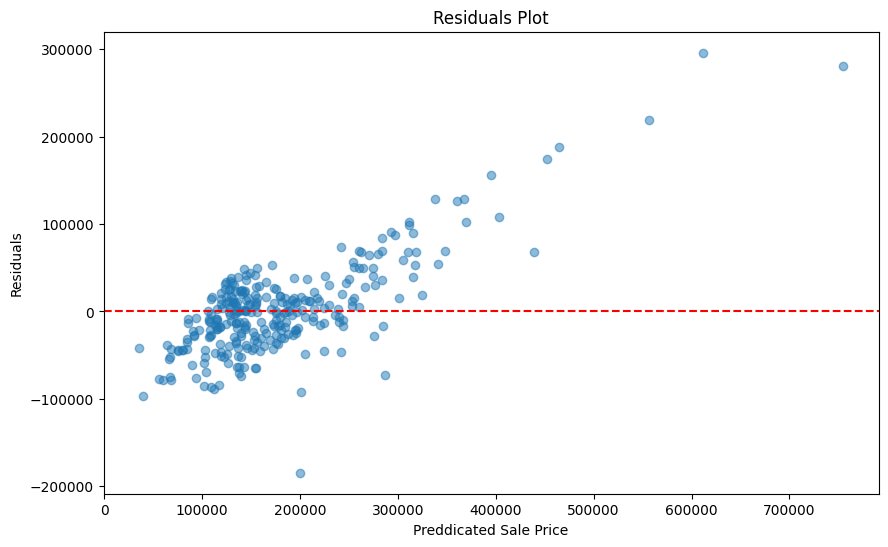

In [18]:
residuals = y_val - y_pred
plt.figure(figsize =(10, 6))
plt.scatter(y_val, residuals, alpha=0.5)
plt.xlabel('Preddicated Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

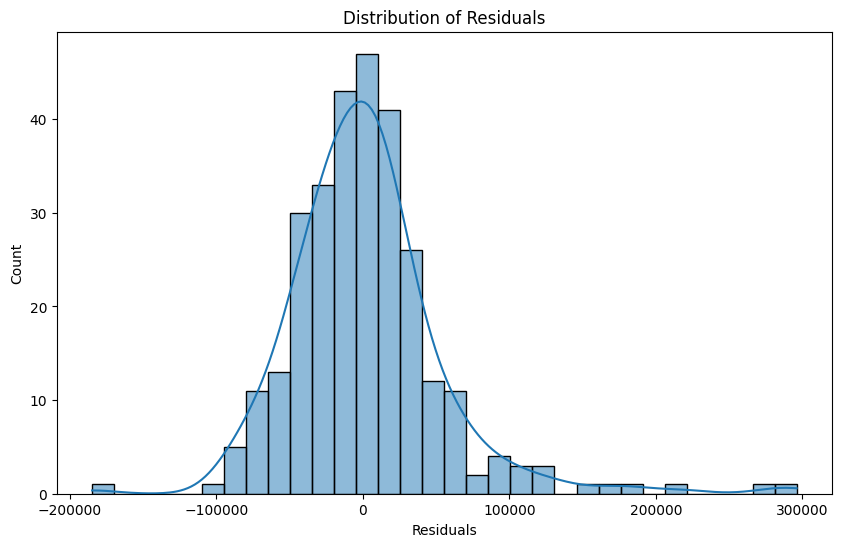

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

<Figure size 1200x800 with 0 Axes>

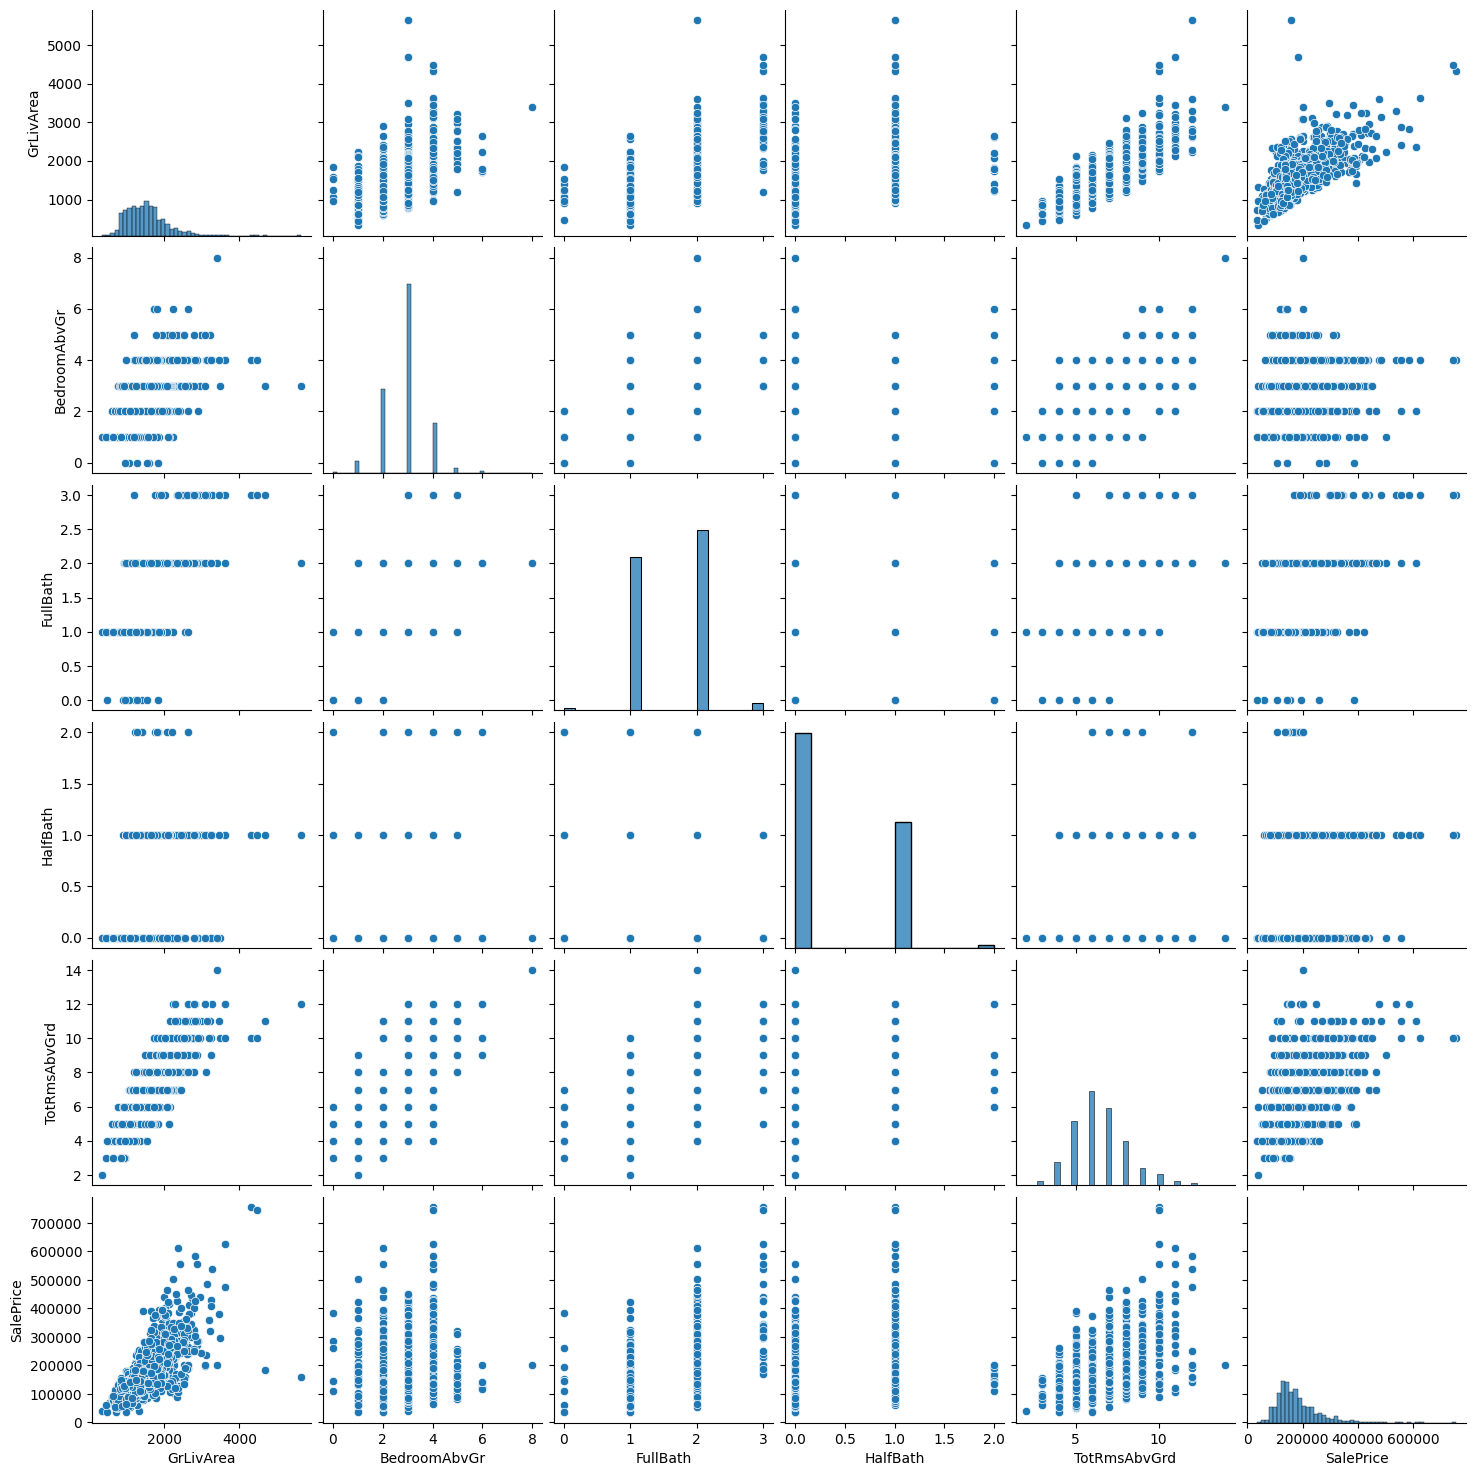

In [20]:
plt.figure(figsize=(12, 8))
sns.pairplot(train_data[features + ['SalePrice']])
plt.show()

In [21]:
example =pd.DataFrame ({
    'GrLivArea':[1500],
    'BedroomAbvGr':[3],
    'FullBath':[2],
    'HalfBath':[1],
    'TotRmsAbvGrd':[6]
})
example_prediction = model.predict(example)
print(f'Example Predicttion: ${example_prediction[0]:,.2f}')

X_test =test_data[features]
test_predictions = model.predict(X_test)
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice:': test_predictions})
submission.to_csv('submission.csv', index=False)

Example Predicttion: $189,891.48
